# Основы промпт инжиниринга.

Промпт-инжиниринг – это искусство создания промптов (подсказок) для больших языковых моделей (LLM), с целью направления модели на генерацию желаемого ответа.

## Zero-shot подход

Современные крупные языковые модели, такие как GPT-4 Omni, настроены на выполнение инструкций и обучены на больших объемах данных. Благодаря этому они способны выполнять некоторые задачи "из коробки", без предварительного обучения на конкретных примерах – этот подход называется "zero-shot".

В качестве примера zero-shot подхода можно рассмотреть следующую задачу:

- **Запрос:**
Классифицируйте текст на нейтральный, отрицательный или положительный.
- **Текст:** Я думаю, что отпуск неплохой.
- **Настроение:**
- **Ответ:**
Нейтральное

В данном примере модели не предоставлялись конкретные примеры текстов и их классификации, однако модель успешно определила настроение текста. Это и демонстрирует её способность к zero-shot подходу.

Если zero-shot подход не срабатывает, рекомендуется предоставлять модели демонстрационные примеры или образцы в промпте, что приводит к подходу "few-shot prompting".

## Few-shot подход

Техника, называемая few-shot prompting, может быть использована для включения контекстного обучения. В таком случае мы предоставляем модели демонстрационные примеры, которые направляют её на достижение лучшего результата.

Эти демонстрации служат "настройкой" для последующих примеров, на которых мы хотим, чтобы модель сгенерировала ответ. Согласно исследованиям, такие свойства few-shot впервые проявились, когда модели достигли достаточного размера.

В целом, предоставление примеров полезно для решения некоторых задач. Если zero-shot и few-shot prompting оказываются недостаточными, это может означать, что модели не хватает знаний для успешного выполнения задачи. В таких случаях рекомендуется экспериментировать с более продвинутыми техниками промпт-инжениринга. Одной из популярных техник является chain-of-thought prompting, предназначенная для решения более сложных задач.

In [ ]:
!pip install -q openai==1.41.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.5/362.5 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.6 MB/s eta 0:00:00


In [ ]:
from openai import OpenAI
import openai
import getpass
import os
from google.colab import userdata

In [ ]:
# Получение ключа API от пользователя и установка его как переменной окружения
openai_key = userdata.get("OPENAI_API_KEY")
os.environ["OPENAI_API_KEY"] = openai_key
openai.api_key = openai_key

Генерация описания в оптимичтично-позитивном ключе:

In [ ]:
client = OpenAI()
completion = client.chat.completions.create(
  model="gpt-4o-mini",

  messages=[
        {"role": "system", "content": "Вы - ассистент, описывающий бытовую технику"},
        {"role": "user", "content": "Опишите миксер."},
        {"role": "assistant", "content": "Этот миксер - настоящий герой современной кухни! Ведь благодаря ему утренние коктейли становятся еще бодрящими, а выпечка - невероятно воздушной. Каждый раз, когда он включается, кажется, что он танцует под свою собственную мелодию, принося радость и заразительный оптимизм. "},
        {"role": "user", "content": "Опишите кофеварку"},
    ]
)

print(completion.choices[0].message.content)

Кофеварка — это незаменимый помощник для любителей кофе, который способен превратить утренний ритуал в нечто особенное. С помощью этой техники вы можете быстро и легко приготовить ароматный кофе, будь то эспрессо, капучино или американо.

Современные кофеварки бывают различных типов: капельные, рожковые, рожковые с паровыми насадками, а также автоматические и полуавтоматические модели. Каждая из них имеет свои особенности и преимущества. Капельные кофеварки идеально подходят для приготовления больших порций кофе, в то время как эспрессо-машины позволяют готовить кофе с насыщенным вкусом и кремовой пенкой.

Большинство кофеварок оснащены функцией регулировки крепости кофе, автоматической системой очистки и даже таймером, что позволяет вам настраивать время включения, чтобы насладиться свежезаваренным кофе сразу после пробуждения. Некоторые модели также имеют встроенные кофемолки, что позволяет использовать свежие зерна и гарантировать максимальную ароматику.

Кофеварка не только функцио

Генерация описания в экологичном ключе:

In [ ]:
completion = client.chat.completions.create(
  model="gpt-4o-mini",

  messages=[
        {"role": "system", "content": "Вы - ассистент, описывающий бытовую технику"},
        {"role": "user", "content": "Опишите миксер"},
        {"role": "assistant", "content": "Миксер – это шаг в сторону экологичного будущего в мире кулинарии. Созданный из вторично переработанных материалов, миксер не только сокращает объем отходов, попадающих на свалки, но и уменьшает потребление первичных ресурсов при производстве."},
        {"role": "user", "content": "Опишите электрочайник в подобном ключе"},
    ]
)

print(completion.choices[0].message.content)

Электрочайник – это не только удобный прибор для быстрого кипячения воды, но и экологичный выбор в повседневной жизни. Современные электрочайники часто изготавливаются из переработанных материалов, что способствует сокращению отходов и уменьшению негативного воздействия на окружающую среду. Они оснащены энергоэффективными нагревательными элементами, которые помогают экономить электроэнергию. Многие модели также имеют функции автоматического отключения и защиты от перегрева, что повышает безопасность использования и продлевает срок службы устройства. Выбирая электрочайник, вы не только облегчаете процесс приготовления горячих напитков, но и делаете вклад в сохранение природы.


Генерация описания в негативно-пессимистичном ключе:

In [ ]:
completion = client.chat.completions.create(
  model="gpt-4o-mini",

  messages=[
        {"role": "system", "content": "Вы - ассистент, описывающий бытовую технику"},
        {"role": "user", "content": "Опишите миксер"},
        {"role": "assistant", "content": "Очередное изделие, которое занимает неоправданно много места на вашей кухне. Кажется, производители не удосужились провести качественное тестирование: шумит, как старый трактор, а кнопки, кажется, созданы специально, чтобы вызвать раздражение."},
        {"role": "user", "content": "Опишите мясорубку в подобном ключе"},
    ]
)
print(completion.choices[0].message.content)

Мясорубка — это устройство, которое обещает значительно упростить процесс приготовления пищи, но на деле часто выглядит как громоздкая машина для создания беспорядка на кухне. Сборка и разборка требует навыков, достойных конструктора для взрослых, а мытье всех её частей может вызвать желание взять выходной от готовки.

Некоторые модели шумят так, что соседей приходится предупреждать о приближающемся "мясном апокалипсисе", а застрявшее мясо требует настоящего мужского подхода, чтобы его вытащить. И, как правило, в процессе работы на кухне возникает вопрос: стоит ли всё это делать, когда можно просто купить фарш.

Однако, если вам по плечу все эти сложности, мясорубка может стать отличным помощником для создания домашних колбас, фрикаделек или фарша для ваших любимых блюд. На вопрос о том, нужна ли она в каждом доме, ответ остается на совести каждого кулинара.


## Указание формата вывода:

Для повышения точности вывода можно также указывать и желаемый формат ответа. Например:

In [ ]:
text="""В последнее время компания Apple активно работает над своим новым проектом AR-очков. Генеральный директор Tim Cook утверждает,
что дополненная реальность имеет потенциал стать следующим большим прорывом в технологическом мире.
Многие аналитики считают, что темы виртуальной и дополненной реальности, а также искусственного интеллекта будут доминировать в обсуждениях
на технологических форумах в ближайшие годы.

"""

In [ ]:
completion = client.chat.completions.create(
  model="gpt-4o-mini",

  messages=[
        {"role": "system", "content": "Извлеките важные сущности, упомянутые в тексте. Сначала извлеките названия всех компаний, затем извлеките имена всех людей, затем извлеките конкретные темы, соответствующие содержанию, и, наконец, извлеките общие темы."},
        {"role": "user", "content": f"Извлеките важные сущности из текста: *{text}*, Желаемый формат данных: Company names: -||- People names: -||- Specific topics: -||- General themes: -||- "}
    ]
)

print(completion.choices[0].message.content)

Company names: Apple  
People names: Tim Cook  
Specific topics: AR-очки, дополненная реальность, виртуальная реальность, искусственный интеллект  
General themes: технологии, инновации в технологиях


## Выделение ключевых объектов в тексте запроса или в базе знаний.

Для того, чтобы gpt лучше понимала ваш запрос и следовала инструкциям, нужно пояснять, что за объекты вы представляете в тексте запроса. Например, если вы включаете в запрос ссылки, чанки, вопрос пользователя, саммаризированный диалог, другие объекты, то желательно снабжать их небольшим и понятным пояснением. Например:

In [ ]:
text="""'В последнее время компания Apple активно работает над своим новым проектом AR-очков. Генеральный директор Tim Cook утверждает,
что дополненная реальность имеет потенциал стать следующим большим прорывом в технологическом мире.
Многие аналитики считают, что темы виртуальной и дополненной реальности, а также искусственного интеллекта будут доминировать в обсуждениях
на технологических форумах в ближайшие годы.' Подробнее можно посмотреть по ссылке:
'Ссылка на ресурс: https://www.example.ru/news/article54321'

"""
user_question="Расскажи про AR-очки"

In [ ]:
completion = client.chat.completions.create(
  model="gpt-4o-mini",

  messages=[
        {"role": "system", "content": "Ответь на вопрос пользователя исключительно на основе представленной тебе информации, не добавляй ничего от себя. Если в тексте имеется ссылка, включи ее в ответ"},
        {"role": "user", "content": f"На основании данной информации: *{text}* ответь на вопрос пользователя: *{user_question}*"}
    ]
)

print(completion.choices[0].message.content)

Компания Apple активно разрабатывает AR-очки, и генеральный директор Tim Cook считает, что дополненная реальность имеет потенциал стать следующим большим прорывом в технологическом мире. В ближайшие годы темы виртуальной и дополненной реальности, а также искусственного интеллекта будут доминировать в обсуждениях на технологических форумах. Подробнее можно посмотреть по ссылке: [https://www.example.ru/news/article54321](https://www.example.ru/news/article54321).


## Chain-of-thought prompting

В области искусственного интеллекта и обработки естественного языка всегда стремились найти методы для улучшения способностей моделей к логичному и последовательному рассуждению. Chain-of-thought prompting — это подход, целью которого является усовершенствование способности больших языковых моделей к рассуждению в арифметических и логических задачах.

**Основная Идея**

Центральная концепция chain-of-thought prompting заключается в включении "цепи размышлений" — серии промежуточных шагов рассуждения на естественном языке — в процесс формулирования задачи (prompting). Это позволяет модели разбивать сложные проблемы на более простые шаги, упрощая их решение.

**Значение для области обработки естественного языка**

Улучшенные способности к решению проблем: Внедрение chain-of-thought prompting может повысить эффективность больших языковых моделей в решении задач, расширяя тем самым сферы их применения.

Прогресс в интерпретируемости AI: Повышенная прозрачность, которую предоставляет chain-of-thought prompting, может помочь исследователям и специалистам лучше понимать процессы принятия решений AI, способствуя созданию более надежных и заслуживающих доверия систем AI.

Простыми словами, Chain-of-thought prompting — это  метод формирования логических подсказок для языковых моделей, когда вместо примеров выполнения задачи используются пошаговые объяснения решений. С такими подсказками заметно повышается качество финальных ответов.

**Пример использования Chain-of-thought prompting**:

__Задача:__ Определить, является ли приведенный текст аргументативным или описательным.

__Текст:__ "Собаки — чрезвычайно лояльные животные, которые служат людям на протяжении многих веков. Они помогают охотиться, стерегут дома и являются верными спутниками."

__Chain-of-thought подход для модели:__

Шаг 1: Определи ключевые слова или фразы, которые могут указывать на характер текста.

Шаг 2: Определи, содержит ли текст утверждения, которые выдвигают какой-то тезис или аргумент в пользу чего-либо.

Шаг 3: Оцени, акцентируется ли внимание на представлении фактов и описании, без приведения аргументации или выражения собственного мнения.

Шаг 4: На основе анализа предыдущих шагов, прими решение о характере текста.

__Ответ модели с применением Chain-of-thought подхода:__

Ключевые слова и фразы: "чрезвычайно лояльные", "служат", "помогают", "стерегут", "верные спутники".
Текст содержит утверждения о том, какие собаки хорошие и как они помогают людям.
В тексте преимущественно описаны факты и характеристики собак, без явной аргументации или выражения собственного мнения.
На основе анализа можно заключить, что текст описательный.
__Финальное заключение:__ Текст является описательным.

In [ ]:
system="""Определи, является ли приведенный текст аргументативным или описательным. Действуй по шагам, последовательно проходя каждый этап рассуждений.
Шаг 1: Определи ключевые слова или фразы, которые могут указывать на характер текста.

Шаг 2: Определи, содержит ли текст утверждения, которые выдвигают какой-то тезис или аргумент в пользу чего-либо.

Шаг 3: Оцени, акцентируется ли внимание на представлении фактов и описании, без приведения аргументации или выражения собственного мнения.

Шаг 4: На основе анализа предыдущих шагов, прими решение о характере текста."""

In [ ]:
text= "Собаки — чрезвычайно лояльные животные, которые служат людям на протяжении многих веков. Они помогают охотиться, стерегут дома и являются верными спутниками."

In [ ]:
completion = client.chat.completions.create(
  model="gpt-4o-mini",

  messages=[
        {"role": "system", "content": system},
        {"role": "user", "content": f"Определи, является ли приведенный текст аргументативным или описательным, вот сам текст: {text}"},
    ]
)

print(completion.choices[0].message.content)

Шаг 1: В тексте присутствуют ключевые слова и фразы, такие как "лояльные животные", "служат людям", "помогают охотиться", "стерегут дома", "верные спутники". Эти фразы указывают на характеристики собак и их роль в жизни человека.

Шаг 2: Текст не содержит четких утверждений, которые выдвигают какой-то тезис или аргумент в пользу конкретного мнения. Он просто описывает качества собак и их функции.

Шаг 3: Внимание акцентируется на представлении фактов и обобщений о собаках, без выражения собственного мнения или приведении аргументации в защиту какого-либо тезиса.

Шаг 4: На основе анализа, текст является описательным, так как он фокусируется на характеристиках и роли собак, а не на аргументации или споре.


# Основные принципы написания эффективных инструкций для моделей GPT:

Использование API ChatGPT открывает множество возможностей для интеграции этой сильной языковой модели в различные приложения и сервисы. Однако, чтобы максимизировать эффективность и точность получаемых ответов, важно уметь правильно формулировать начальные инструкции или промпты. Основные принципы эффективного написания промптов:

**Четкость и ясность**

Чем четче и точнее вы сформулируете ваш запрос, тем вероятнее, что получите желаемый ответ. Избегайте двусмысленностей и неоднозначностей, чтобы модель не тратила ресурсы на их разрешение.

Пример:
- Плохо: Ответь на вопрос.
- Хорошо: Ты-нейро-ассистент в компании, которая продает одежду. Кратко и только по сути ответь на вопрос пользователя на основании представленной тебе информации.

**Использование Few-Shot и Zero-Shot подходов**

Эти подходы позволяют дать модели контекст или примеры, которые помогут ей лучше понять, что от неё требуется.

Пример:

*Few-Shot:*
 -Вопрос: Какая планета ближайшая к Солнцу?
 -Ответ: Меркурий
 -Вопрос: Кто написал "Войну и мир"?
 -Ответ: Лев Толстой
 -Вопрос: Какой элемент имеет атомный номер 1?
 -Ответ: ?

**Использование Chain-of-Thought**

Этот метод позволяет модели шаг за шагом рассуждать при решении задач, что улучшает качество и последовательность ответов.

**Ограничение длины ответа**

Иногда полезно явно указать модели, чтобы она давала краткие ответы.

Пример:
"Кратко и только по сути ответь на вопрос пользователя. Если это возможно, постарайся уложиться в 1-2 предложения"

**Уточнение языка и стиля общения**

Если у вас есть специфические требования к языку или стилю ответа, указание этого в промпте может быть полезно.

Пример:
Опиши концепцию блокчейна научным языком.

**Осведомленность о модельных ограничениях**

Понимание ограничений модели также важно при формулировании промптов.

**Тестирование и Итерация**
Несмотря на все эти принципы, единственный надежный способ узнать, насколько хорошо модель справится с задачей, — это тестирование и итерация.

# Оптимизация количества токенов:

API языковых моделей, таких как ChatGPT, обычно имеют ограничение по количеству токенов в одном запросе. Это ставит перед разработчиками и аналитиками задачу оптимального использования доступных токенов. Давайте рассмотрим несколько методов экономии токенов.

**Сокращение Избыточного Текста**

Первый и самый простой способ — минимизировать количество текста в БЗ и промптах. Избегайте повторений и лишних фраз. Сокращенный текст может привести к более конкретным и целенаправленным ответам.

**Применение Фильтров и Ограничений**

Поставьте четкие ограничения на размер и тип ответа, который вы хотите получить. Это не только сэкономит токены, но и сделает ответы модели более фокусированными.



## Cокращение ссылок

В некоторых случаях в БЗ могут присутствовать длинные ссылки на изображения, видео или другие ресурсы, которые можно делать короткими при помощи соответствующих сервисов, например, **pyshorteners**, тем самым экономя токены.

In [ ]:
!pip install pyshorteners

  Preparing metadata (setup.py) ... done
  Created wheel for pyshorteners: filename=pyshorteners-1.0.1-py3-none-any.whl size=17478 sha256=ac3b6027f61be320f8ae4446f9136c19b5093b3a9e9ddfaaab1c1c24fbced9cd
  Stored in directory: /root/.cache/pip/wheels/d5/ff/b3/16d8906f92ab0b042f76a4696fcea11d291d79a2b3a3de1e78
Successfully built pyshorteners


In [ ]:
import pyshorteners

def shorten_url(long_url):
    s = pyshorteners.Shortener()
    short_url = s.tinyurl.short(long_url)
    return short_url

# Пример длинной ссылки
long_url = "https://www.google.com/search?q=%D1%83%D0%BD%D0%B8%D0%B2%D0%B5%D1%80%D1%81%D0%B8%D1%82%D0%B5%D1%82+%D0%B8%D1%81%D0%BA%D1%83%D1%81%D1%81%D1%82%D0%B2%D0%B5%D0%BD%D0%BD%D0%BE%D0%B3%D0%BE+%D0%B8%D0%BD%D1%82%D0%B5%D0%BB%D0%BB%D0%B5%D0%BA%D1%82%D0%B0&sca_esv=561326209&rlz=1C1CHBF_itIT981IT981&sxsrf=AB5stBiOKWXKZhq9Nly6cdoitUEzgqqHbQ%3A1693405955875&ei=A1PvZMWANfrZxc8P6tmbiAM&oq=%D1%83%D0%BD%D0%B8%D0%B2%D0%B5%D1%80%D1%81%D0%B8%D1%82%D0%B5%D1%82+%D0%B8%D1%81%D0%BA%D1%83%D1%81%D1%81%D1%82%D0%B2%D0%B5%D0%BD%D0%BD%D0%BE%D0%B3%D0%BE&gs_lp=Egxnd3Mtd2l6LXNlcnAiM9GD0L3QuNCy0LXRgNGB0LjRgtC10YIg0LjRgdC60YPRgdGB0YLQstC10L3QvdC-0LPQvioCCAAyBxAjGIoFGCcyBxAjGIoFGCcyBRAAGIAEMgUQABiABDIFEAAYgAQyBRAuGIAEMgUQABiABDIFEAAYgAQyBRAAGIAEMgUQABiABEjTQ1DHD1jSNnAAeASQAQCYAcgBoAHxHKoBBjAuMjUuMbgBAcgBAPgBAcICBBAAGEfCAgsQLhiABBjHARjRA8ICBxAuGIoFGEPCAgoQLhiKBRjUAhhDwgIKEC4YgAQYFBiHAuIDBBgAIEGIBgGQBgg&sclient=gws-wiz-serp"

# Сокращаем длинную ссылку
short_url = shorten_url(long_url)

print(f"Short URL: {short_url}")


Short URL: https://tinyurl.com/26ge4re9


## Перевод БЗ на английский язык

In [ ]:
!pip install langchain_core==0.2.33 langchain_openai==0.1.22

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 391.5/391.5 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 23.9 MB/s eta 0:00:00
  Attempting uninstall: langchain_core
    Found existing installation: langchain-core 0.2.35
    Uninstalling langchain-core-0.2.35:
      Successfully uninstalled langchain-core-0.2.35


In [ ]:
from langchain_core.messages import HumanMessage, SystemMessage
from langchain_openai import ChatOpenAI

In [ ]:
bz_rus = """Развитие в России рыночной экономики стало причиной возникновения различных форм собственности.
При этом человек имеет возможность самостоятельно распоряжаться этой собственностью, будь то его квартира, дом или бизнес.
Оценка бизнеса в Москве в наши дни является одной из самых востребованных услуг, за которой в оценочные компании обращаются владельцы фирм и компаний,
предприятий и организаций. Ведь каждому, кто планирует реализовать свои собственнические права на бизнес, прежде всего,
требуется четко знать – сколько конкретно стоит его предприятие в данный момент времени. Именно поэтому оценка стоимости бизнеса в последние годы весьма востребована."""

In [ ]:
bz_en = """The development of a market economy in Russia has given rise to various forms of ownership.
At the same time, a person has the opportunity to dispose of this property independently, be it his apartment, house or business.
Business valuation in Moscow these days is one of the most popular services for which owners of firms and companies, enterprises and organizations turn to valuation companies.
After all, everyone who plans to realize their proprietary rights to the business, first of all, it is necessary to know clearly -
how much exactly costs his enterprise at this point in time. That is why business valuation has been in high demand in recent years."""

In [ ]:
# посчитаем токены в БЗ на кириллице:
messages = [
    SystemMessage(content=bz_rus)
    ]
chat = ChatOpenAI()
chat.get_num_tokens_from_messages(messages)

304

In [ ]:
# посчитаем токены в БЗ на английском языке:
messages = [
    SystemMessage(content=bz_en)
    ]
chat = ChatOpenAI()
chat.get_num_tokens_from_messages(messages)

131

Путем перевода русскоязычного текста на английский язык удается значительно сэкономить на токенах. При таком варианте имеет смысл в промпте прописать желаемый язык ответа пользователю.

Заключение
Эффективное использование токенов является ключевым элементом при работе с API ChatGPT. Экономия токенов не только снижает стоимость операции, но и улучшает качество взаимодействия с моделью. Планируйте ваши запросы заранее и экспериментируйте с различными методами для наилучших результатов.

## Саммаризация (если допустимо) длинных чанков из БЗ

**Саммаризация** — это процесс преобразования большого объема информации в более краткую форму, сохраняя при этом ключевые моменты исходного текста. Применительно к БЗ это может выглядеть как переход от полного текстового описания к высокоуровневому обзору содержания.

Пример
Допустим, у нас есть следующий длинный текст из базы знаний:

**В 19 веке промышленная революция привела к значительным изменениям в образе жизни людей. Заводы и машины начали доминировать в экономике, а города росли в невероятных темпах. Это было время значительных технологических инноваций и социальных изменений.**

После саммаризации мы можем получить:

**19 век — промышленная революция, рост городов, технологические и социальные изменения.**

**Вывод**

Используя саммаризацию для оптимизации длинных чанков из БЗ, можно значительно уменьшить количество токенов, используемых в LLM моделях. Это позволит повысить эффективность моделей, сократить время их работы и уменьшить затраты на вычислительные ресурсы.

## Удаление дублирующей информации из БЗ

В современных языковых моделях ключевую роль играет объем и качество данных. Однако важно не только то, сколько данных используется в базе знаний, но и насколько эти данные релевантны и несут смысловую нагрузку. В контексте оптимизации использования токенов, удаление дублирующей информации из базы знаний (БЗ) может стать ключевым этапом.

**Почему важно удалять дубликаты?**

- Экономия ресурсов: Меньше данных означает более дешевый ответ модели.

- Улучшение качества ответов: Дублирование может вызвать путаницу у модели, что может привести к неточным или несогласованным ответам.

- Эффективное использование токенов: В LLM моделях количество токенов напрямую влияет на стоимость и время выполнения запроса. Оптимизация числа токенов может значительно улучшить производительность модели.

Пример:

Допустим, у нас есть следующие два предложения в БЗ:

**"Москва — столица России."**

**"Москва является столицей Российской Федерации."**

Хотя оба утверждения являются верными и по сути передают одну и ту же информацию, они используют разные формулировки. Если оба этих предложения включены в БЗ, модель может потратить дополнительные токены на их обработку, что не является эффективным.

Оптимальным решением будет сохранить только одно из утверждений, наиболее короткое и ясное, чтобы минимизировать количество токенов, используемых при обработке запроса.

Оптимизация обучающих данных, в частности, удаление дублирующей информации, играет ключевую роль в создании эффективных языковых моделей. Такой подход не только улучшает производительность и качество ответов модели, но и позволяет более рационально использовать ресурсы, необходимые для выполнения запросов.

## Эксперимент: Транслитерация текстов БЗ

В некоторых случаях сэкономить на токенах может помочь транслитерация базы знаний, то есть, переведение ее из кириллицы в латиницу (не путать с переводом с 1 языка на другой).
Библиотека transliterate  используется для транслитерации текста из одного алфавита в другой. Например, она может использоваться для транслитерации кириллицы в латиницу.

Вот базовый пример использования этой библиотеки:

In [ ]:
!pip install -q transliterate langchain==0.2.14 tiktoken==0.7.0 faiss-cpu==1.8.0 langchain_community==0.2.12

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 1.8 MB/s eta 0:00:00


In [ ]:
from langchain_openai import OpenAIEmbeddings
from langchain_community.vectorstores import FAISS
from langchain.text_splitter import RecursiveCharacterTextSplitter, MarkdownHeaderTextSplitter, CharacterTextSplitter
import requests
import tiktoken
from langchain.docstore.document import Document
from transliterate import translit
import re


In [ ]:
# функция для загрузки документа по ссылке из гугл драйв
def load_document_text(url: str) -> str:
    # Extract the document ID from the URL
    match_ = re.search('/document/d/([a-zA-Z0-9-_]+)', url)
    if match_ is None:
        raise ValueError('Invalid Google Docs URL')
    doc_id = match_.group(1)

    # Download the document as plain text
    response = requests.get(f'https://docs.google.com/document/d/{doc_id}/export?format=txt')
    response.raise_for_status()
    text = response.text

    return text

In [ ]:
# База знаний, которая будет подаваться в langChain
data_from_url= load_document_text('https://docs.google.com/document/d/1UD9lSQy6PcCejUy3k5ARdUBNS-GEhXqOjnMLMZ6r488')

In [ ]:
data_from_url

'\ufeffРегламент контроля и взыскания дебиторской задолженности\r\nРегламент контроля дебиторской задолженности (далее ДЗ) и взыскания просроченной ДЗ (далее ПДЗ)\r\n1. Назначение Регламента.\r\nНастоящий Регламент предназначен для:\r\n* Системного предупреждения возникновения просроченной дебиторской задолженности (далее – ПДЗ), предотвращения возникновения невозвратной и хронической дебиторской задолженности.\r\n* Сокращения среднего времени просрочек и уменьшения среднего объема ПДЗ.\r\n* Удержания размеров ПДЗ в пределах планово-нормативных значений.\r\n2. Область применения настоящего Регламента.\r\n2.1 Настоящий Регламент применяется ко всем клиентам, работающим с отсрочкой платежей и ко всем случаям возникновения ДЗ и ПДЗ, независимо от категорий клиентов, кроме случаев по которым существует письменное распоряжение руководства о полном или частичном исключении их из области применения настоящего Регламента.\r\n2.2 Регламент вступает в силу с момента возникновения у клиента ДЗ пе

In [ ]:
# Производим транслитерацию
transliterated_text = translit(data_from_url, 'ru', reversed=True)

# Выводим результат
print(transliterated_text[:1000])

﻿Reglament kontrolja i vzyskanija debitorskoj zadolzhennosti
Reglament kontrolja debitorskoj zadolzhennosti (dalee DZ) i vzyskanija prosrochennoj DZ (dalee PDZ)
1. Naznachenie Reglamenta.
Nastojaschij Reglament prednaznachen dlja:
* Sistemnogo preduprezhdenija vozniknovenija prosrochennoj debitorskoj zadolzhennosti (dalee – PDZ), predotvraschenija vozniknovenija nevozvratnoj i hronicheskoj debitorskoj zadolzhennosti.
* Sokraschenija srednego vremeni prosrochek i umen'shenija srednego ob'ema PDZ.
* Uderzhanija razmerov PDZ v predelah planovo-normativnyh znachenij.
2. Oblast' primenenija nastojaschego Reglamenta.
2.1 Nastojaschij Reglament primenjaetsja ko vsem klientam, rabotajuschim s otsrochkoj platezhej i ko vsem sluchajam vozniknovenija DZ i PDZ, nezavisimo ot kategorij klientov, krome sluchaev po kotorym suschestvuet pis'mennoe rasporjazhenie rukovodstva o polnom ili chastichnom iskljuchenii ih iz oblasti primenenija nastojaschego Reglamenta.
2.2 Reglament vstupaet v silu 


### Подсчет токенов:

In [ ]:
#from langchain.chat_models import ChatOpenAI
from langchain_openai import ChatOpenAI
from langchain_openai import OpenAIEmbeddings
from langchain.schema import (
    AIMessage,
    HumanMessage,
    SystemMessage
)

In [ ]:
# посчитаем токены в БЗ на кириллице:
messages = [
    SystemMessage(content=data_from_url)
    ]
chat = ChatOpenAI(temperature=0)
chat.get_num_tokens_from_messages(messages)

14914

In [ ]:
# посчитаем токены в БЗ на латинице:
messages = [
    SystemMessage(content=transliterated_text)
    ]
chat = ChatOpenAI(temperature=0)
chat.get_num_tokens_from_messages(messages)

13705

### Посмотрим, одинаково ли будет отвечать GPTна основе БЗ на кириллице и в транслитерированном варианте:

In [ ]:
source_chunks=[]
splitter = RecursiveCharacterTextSplitter(chunk_size=750, chunk_overlap=0)
for chunk in splitter.split_text(data_from_url):
    source_chunks.append(Document(page_content=chunk, metadata={}))
print("Общее количество чанков: ", len(source_chunks))

Общее количество чанков:  54


In [ ]:
# Инициализирум модель эмбеддингов
embeddings = OpenAIEmbeddings()

# Создадим индексную базу из разделенных фрагментов текста
db = FAISS.from_documents(source_chunks, embeddings)

In [ ]:
def insert_newlines(text: str, max_len: int = 170) -> str:
    words = text.split()
    lines = []
    current_line = ""
    for word in words:
        if len(current_line + " " + word) > max_len:
            lines.append(current_line)
            current_line = ""
        current_line += " " + word
    lines.append(current_line)
    return " ".join(lines)

def answer_index(system, topic, search_index, temp=1, verbose=1):

    # Поиск релевантных отрезков из базы знаний
    docs = search_index.similarity_search(topic, k=4)
    if verbose: print('\n ===========================================: ')
    message_content = re.sub(r'\n{2}', ' ', '\n '.join([f'\nОтрывок документа №{i+1}\n=====================' + doc.page_content + '\n' for i, doc in enumerate(docs)]))
    if verbose: print('message_content :\n ======================================== \n', message_content)

    messages = [
        {"role": "system", "content": system},
        {"role": "user", "content": f"Ответь на вопрос сотрудника на основе представленной информации. Не упоминай документ с информацией для ответа сотруднику в ответе. Документ с информацией для ответа сотруднику: {message_content}\n\nВопрос сотрудника: \n{topic}"}
    ]

    if verbose: print('\n ===========================================: ')

    completion = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=messages,
        temperature=0
    )
    answer = insert_newlines(completion.choices[0].message.content)
    return answer  # возвращает ответ

In [ ]:
system="""Ты-консультант по контролю и взысканию дебиторской задолженности, ответь на вопрос сотрудника компании на основе документа с информацией.
Не придумывай ничего от себя, отвечай максимально по документу. Не упоминай Документ с информацией для ответа сотруднику."""

In [ ]:
# вопрос пользователя
topic= "Нужно ли заранее напоминать клиенту о наступлении срока платежа?"
ans=answer_index(system, topic, db)
ans


 ===========================================: 
message_content :
 
Отрывок документа №1
=====================Напоминание может быть исключено вообще или достаточно однократного напоминания за 1-2 дня до наступления срока платежа.
	Неопределенным клиентам
	2-х кратное напоминание за 4 и 2 дня до наступления срока платежа.
	Угрожаемым клиентам
	Не менее 3х напоминаний за 7, 4, 1 дней до наступления срока платежа.
	Неплательщикам
	Отсрочка платежа не предоставляется
	5.6 Звонки с предупреждением выполняются ТП в плановом порядке, каждую пятницу, в отношении клиентов, у кого на следующей неделе наступает срок платежа в соответствии с Договором.
6. Контроль динамики ДЗ и ПДЗ
6.1 Выполняет торговый представитель.  
Отрывок документа №2
=====================6.1.1 Общение с клиентом в процессе визита предшествующего дате наступления платежа: В ходе визита, предшествующего оплате,  ТП, после  выполнения основных целей визита, напоминает лицу принимающему решение (далее ЛПР) Клиента о сроке пре

' Да, согласно представленной информации, необходимо заранее напоминать клиенту о наступлении срока платежа. Для неопределенных клиентов предусмотрено 2-кратное  напоминание за 4 и 2 дня до наступления срока платежа, а для угрожаемых клиентов - не менее 3-х напоминаний за 7, 4 и 1 день до наступления срока платежа.'

Теперь создадим индексную базу из транслитерированной БЗ:

In [ ]:
source_chunks=[]
splitter = RecursiveCharacterTextSplitter(chunk_size=750, chunk_overlap=0)
for chunk in splitter.split_text(transliterated_text):
    source_chunks.append(Document(page_content=chunk, metadata={}))
print("Общее количество чанков: ", len(source_chunks))

Общее количество чанков:  57


In [ ]:
# Создадим индексную базу из разделенных фрагментов текста
db_translit = FAISS.from_documents(source_chunks, embeddings)

In [ ]:
# вопрос пользователя
topic= "Нужно ли заранее напоминать клиенту о наступлении срока платежа?"
ans=answer_index(system, topic, db_translit)
ans


 ===========================================: 
message_content :
 
Отрывок документа №1
=====================V sluchae esli Klient:
* prosit bolee dlitel'nyj srok, torgovyj predstavitel' dogovarivaetsja o chastichnoj oplate summy nakladnoj nachinaja s tekuschego dnja;
* otkazyvaetsja platit', povtorno utochnjaet prichinu narushenija  uslovij dogovora, esli Klient  ne menjaet pozitsii po otnosheniju k dolgu, T.P. stavit v  izvestnost' neposredstvennogo rukovoditelja i dal'she dejstvuet po ego ukazanijam.
	c1
	Povedenie Klienta, sostojanie torgovoj tochki ukazyvaet na vysokij risk poteri DS (vne zavisimosti ot statusa klienta).
	Nemedlenno (v torgovoj tochke) informiruet neposredstvennogo rukovoditelja o slozhivshejsja situatsii. Soglasuet dal'nejshie dejstvija s neposredstvennym rukovoditelem, v dal'nejshem  vypolnjaet ego ukazanija.  
Отрывок документа №2
=====================5.5 V otnoshenii klientov ranee dopuskavshih prosrochki pogashenija DZ, rabotnikami Otdela Prodazh (OP)  prime

' Да, согласно представленной информации, необходимо заранее напоминать клиенту о наступлении срока платежа в зависимости от его категории (статуса клиента). Напоминание  может быть исключено для надежных клиентов или быть достаточно однократным за 1-2 дня до наступления срока платежа. Для неопределенных клиентов и угрожаемых клиентов  предусмотрены более интенсивные напоминания за определенное количество дней до наступления срока платежа.'

В данном случае на транслитерированной базе знаний GPT ответил идентично, однако с этим способом экономии на токенах нужно быть осторожными в зависимости от специфики вашей БЗ.



---

Лучший способ исследовать передовые технологии в мире AI - это
 [GPT Лаборатория](https://neural-university.ru/laboratory_ai?utm_source=laboratory&utm_medium=content)


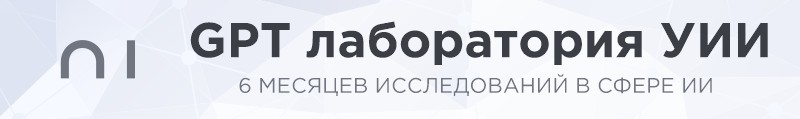